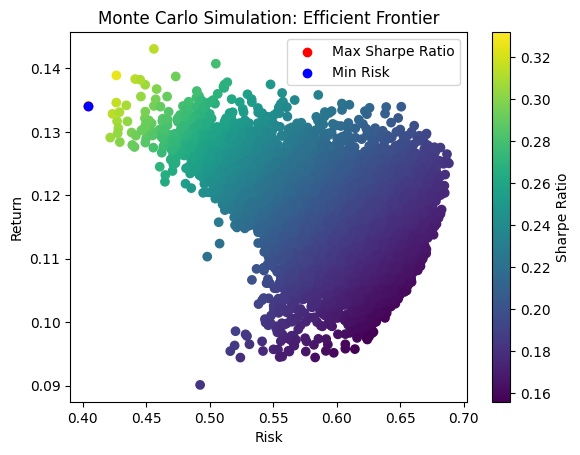

Portfolio with Maximum Sharpe Ratio:
Asset 1    0.000820
Asset 2    0.504895
Asset 3    0.487868
Asset 4    0.006417
Name: 4603, dtype: float64
Return    0.134128
Risk      0.404246
Sharpe    0.331797
Name: 4603, dtype: float64

Portfolio with Minimum Risk:
Asset 1    0.000820
Asset 2    0.504895
Asset 3    0.487868
Asset 4    0.006417
Name: 4603, dtype: float64
Return    0.134128
Risk      0.404246
Sharpe    0.331797
Name: 4603, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data: Expected returns and covariance matrix
np.random.seed(42)  # For reproducibility
n_assets = 4
expected_returns = np.random.uniform(0.05, 0.15, n_assets)
cov_matrix = np.random.rand(n_assets, n_assets)
cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Symmetric covariance matrix
np.fill_diagonal(cov_matrix, 0.2)  # Set variances

# Monte Carlo Simulation
n_portfolios = 10000
results = np.zeros((n_portfolios, 3))  # Columns: return, risk, Sharpe ratio
weights_record = []

for i in range(n_portfolios):
    # Generate random weights
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)  # Ensure weights sum to 1
    weights_record.append(weights)
    
    # Portfolio return and risk
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_risk  # Assume risk-free rate = 0
    
    # Store results
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_risk
    results[i, 2] = sharpe_ratio

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Return', 'Risk', 'Sharpe'])
weights_df = pd.DataFrame(weights_record, columns=[f'Asset {i+1}' for i in range(n_assets)])

# Identify optimal portfolios
max_sharpe_idx = results_df['Sharpe'].idxmax()  # Maximum Sharpe ratio
min_risk_idx = results_df['Risk'].idxmin()  # Minimum risk

# Plot Efficient Frontier
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Risk'], results_df.loc[max_sharpe_idx, 'Return'], color='red', label='Max Sharpe Ratio')
plt.scatter(results_df.loc[min_risk_idx, 'Risk'], results_df.loc[min_risk_idx, 'Return'], color='blue', label='Min Risk')
plt.title('Monte Carlo Simulation: Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

# Display optimal portfolios
print("Portfolio with Maximum Sharpe Ratio:")
print(weights_df.loc[max_sharpe_idx])
print(results_df.loc[max_sharpe_idx])

print("\nPortfolio with Minimum Risk:")
print(weights_df.loc[min_risk_idx])
print(results_df.loc[min_risk_idx])
